Modelling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import dataset
df = pd.read_csv("/content/balanced_dataset_tokopedia.csv")
df.head()

,Ulasan,Compound_Score,Sentiments
0,"cancel the purchase of tokopedia, the seller i...",-0.0155,Negatif
1,The cod method is ugly and complicated,-0.5106,Negatif
2,"already completed the verification mission, di...",-0.6072,Negatif
3,"Tokopedia shopping is easy, hopefully",0.6808,Positif
4,send to different shops,0.0000,Netral


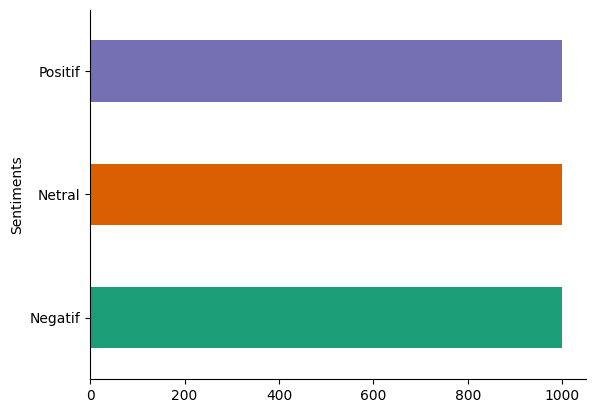

In [ ]:
# @title Sentiments

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiments').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Klasifikasi Rf dengan TF-IDF

RASIO PENGUJIAN
90:10
80:20
70:30
60:40
50:50
40:60
30:70
20:80
10:90

**RASIO 90:10**

Random Forest Accuracy: 0.8033333333333333
Random Forest Precision: 0.8096351596516691
Random Forest Recall: 0.8033333333333333
Random Forest F1 Score: 0.8012007941106302
Confusion Matrix for Random Forest:
[[97 11  6]
 [10 89  3]
 [23  6 55]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.75      0.85      0.80       114
      Netral       0.84      0.87      0.86       102
     Positif       0.86      0.65      0.74        84

    accuracy                           0.80       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.81      0.80      0.80       300



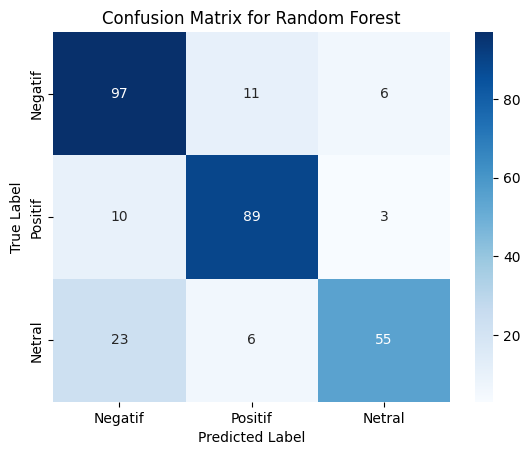

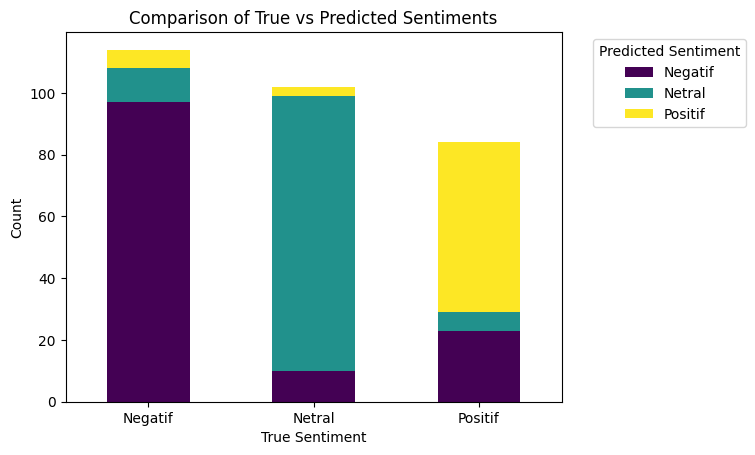

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (90:10)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.10,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 80:20**

Random Forest Accuracy: 0.79
Random Forest Precision: 0.8080221107818555
Random Forest Recall: 0.79
Random Forest F1 Score: 0.7885538186905968
Confusion Matrix for Random Forest:
[[171  16   8]
 [ 26 177   6]
 [ 49  21 126]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.70      0.88      0.78       195
      Netral       0.83      0.85      0.84       209
     Positif       0.90      0.64      0.75       196

    accuracy                           0.79       600
   macro avg       0.81      0.79      0.79       600
weighted avg       0.81      0.79      0.79       600



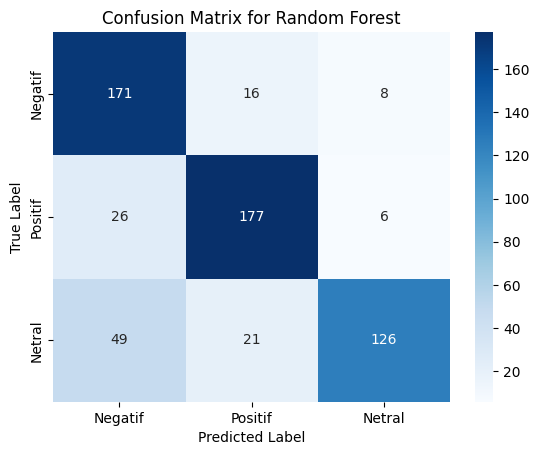

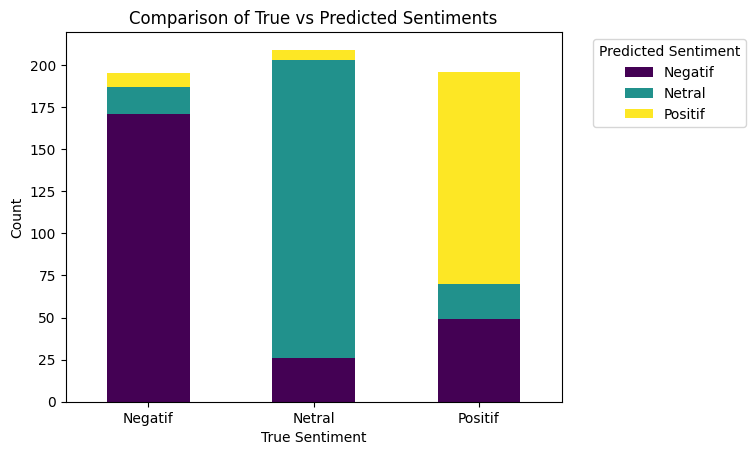

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.20,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 70:30**

Random Forest Accuracy: 0.7944444444444444
Random Forest Precision: 0.8204870491528586
Random Forest Recall: 0.7944444444444444
Random Forest F1 Score: 0.794568419042162
Confusion Matrix for Random Forest:
[[255  24   8]
 [ 40 252   6]
 [ 81  26 208]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.68      0.89      0.77       287
      Netral       0.83      0.85      0.84       298
     Positif       0.94      0.66      0.77       315

    accuracy                           0.79       900
   macro avg       0.82      0.80      0.79       900
weighted avg       0.82      0.79      0.79       900



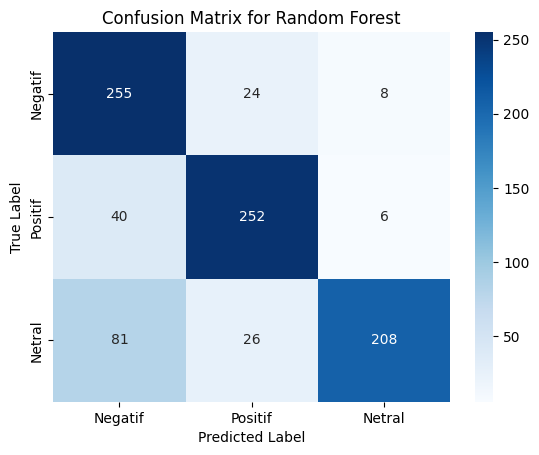

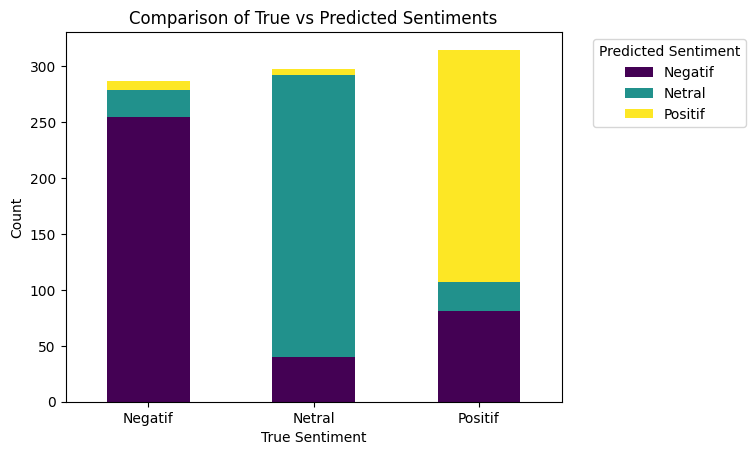

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (70:30)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.30,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 60:40**

Random Forest Accuracy: 0.7841666666666667
Random Forest Precision: 0.8038857441894885
Random Forest Recall: 0.7841666666666667
Random Forest F1 Score: 0.7831854612635559
Confusion Matrix for Random Forest:
[[335  43  18]
 [ 41 334   9]
 [113  35 272]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.69      0.85      0.76       396
      Netral       0.81      0.87      0.84       384
     Positif       0.91      0.65      0.76       420

    accuracy                           0.78      1200
   macro avg       0.80      0.79      0.78      1200
weighted avg       0.80      0.78      0.78      1200



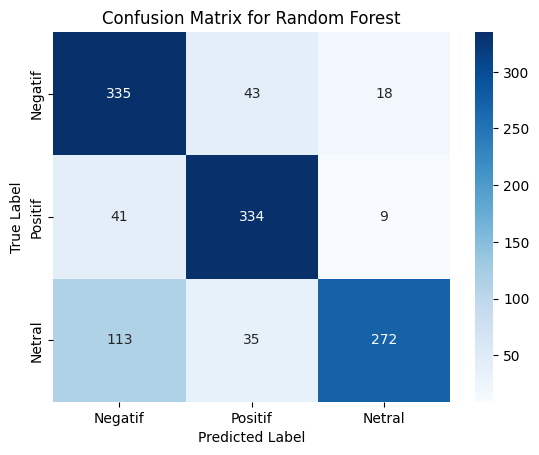

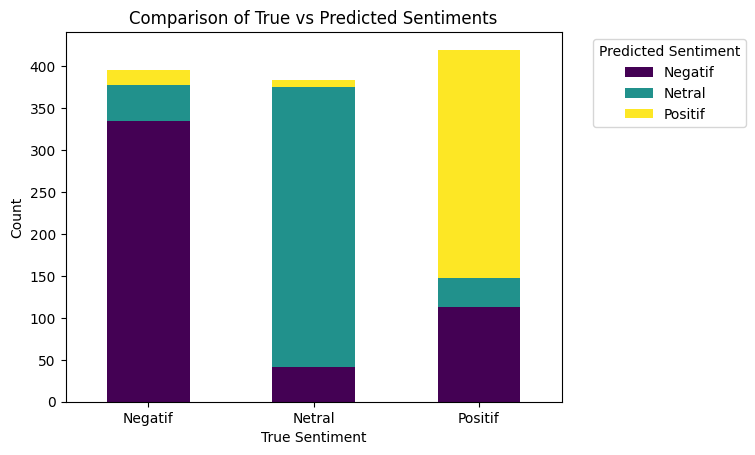

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (60:40)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.40,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 50:50**

Random Forest Accuracy: 0.7813333333333333
Random Forest Precision: 0.7974834672226006
Random Forest Recall: 0.7813333333333333
Random Forest F1 Score: 0.7811663449488073
Confusion Matrix for Random Forest:
[[422  55  20]
 [ 62 406  21]
 [126  44 344]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.69      0.85      0.76       497
      Netral       0.80      0.83      0.82       489
     Positif       0.89      0.67      0.77       514

    accuracy                           0.78      1500
   macro avg       0.80      0.78      0.78      1500
weighted avg       0.80      0.78      0.78      1500



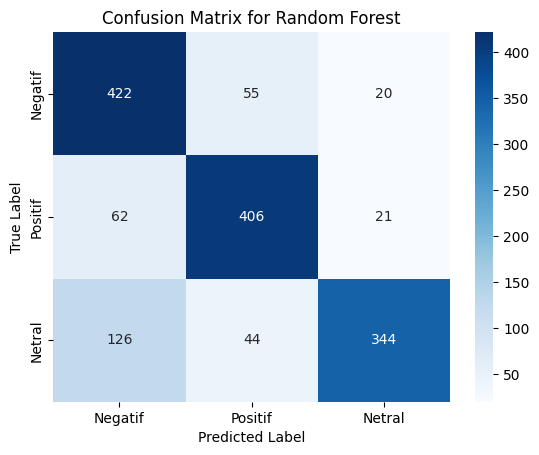

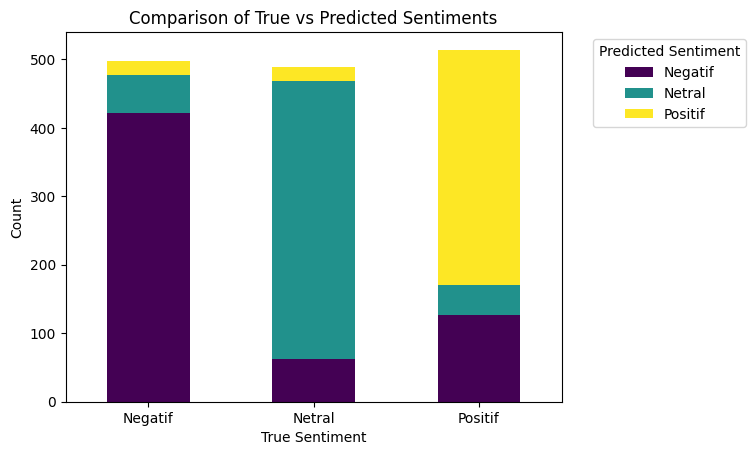

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (50:50)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.50,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 40:60**

Random Forest Accuracy: 0.7872222222222223
Random Forest Precision: 0.8056923805602786
Random Forest Recall: 0.7872222222222223
Random Forest F1 Score: 0.7866793884890948
Confusion Matrix for Random Forest:
[[515  74  20]
 [ 70 498  14]
 [147  58 404]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.70      0.85      0.77       609
      Netral       0.79      0.86      0.82       582
     Positif       0.92      0.66      0.77       609

    accuracy                           0.79      1800
   macro avg       0.81      0.79      0.79      1800
weighted avg       0.81      0.79      0.79      1800



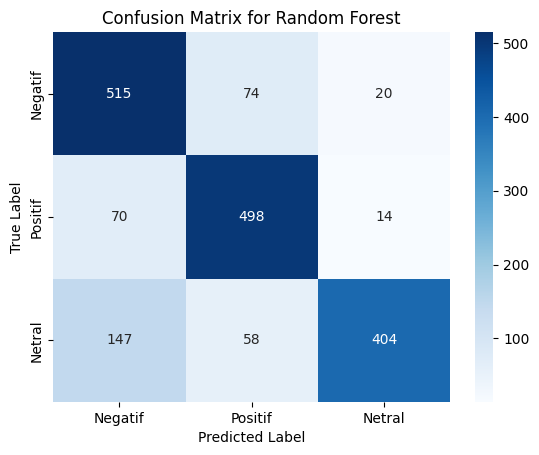

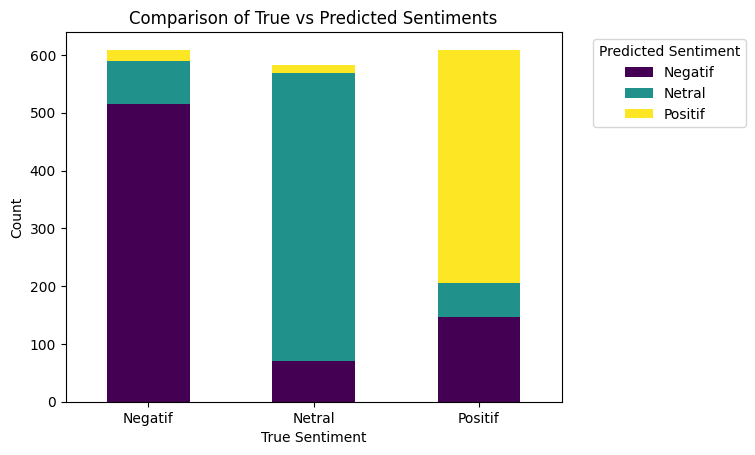

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (40:60)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.60,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 30:70**

Random Forest Accuracy: 0.7771428571428571
Random Forest Precision: 0.7901228974814294
Random Forest Recall: 0.7771428571428571
Random Forest F1 Score: 0.776120529523278
Confusion Matrix for Random Forest:
[[562 104  41]
 [ 70 599  16]
 [159  78 471]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.71      0.79      0.75       707
      Netral       0.77      0.87      0.82       685
     Positif       0.89      0.67      0.76       708

    accuracy                           0.78      2100
   macro avg       0.79      0.78      0.78      2100
weighted avg       0.79      0.78      0.78      2100



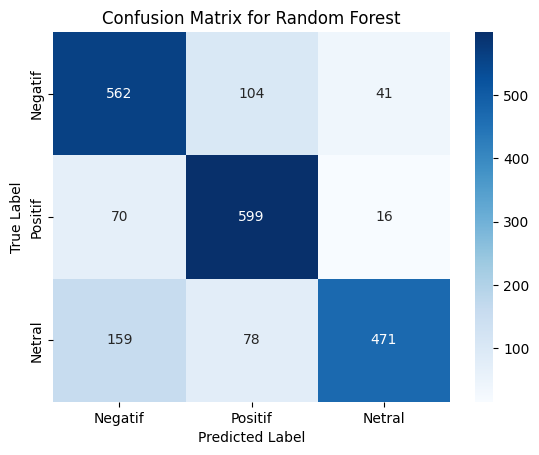

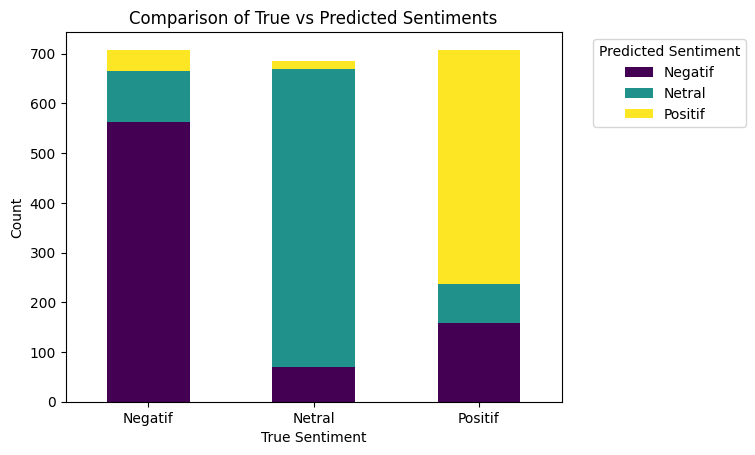

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (30:70)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.70,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 20:80**

Random Forest Accuracy: 0.75
Random Forest Precision: 0.7731518034626645
Random Forest Recall: 0.75
Random Forest F1 Score: 0.7469773042385726
Confusion Matrix for Random Forest:
[[626 134  34]
 [ 79 684  18]
 [204 131 490]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.69      0.79      0.74       794
      Netral       0.72      0.88      0.79       781
     Positif       0.90      0.59      0.72       825

    accuracy                           0.75      2400
   macro avg       0.77      0.75      0.75      2400
weighted avg       0.77      0.75      0.75      2400



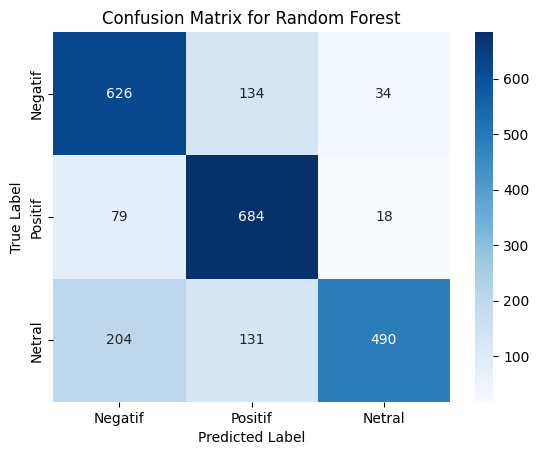

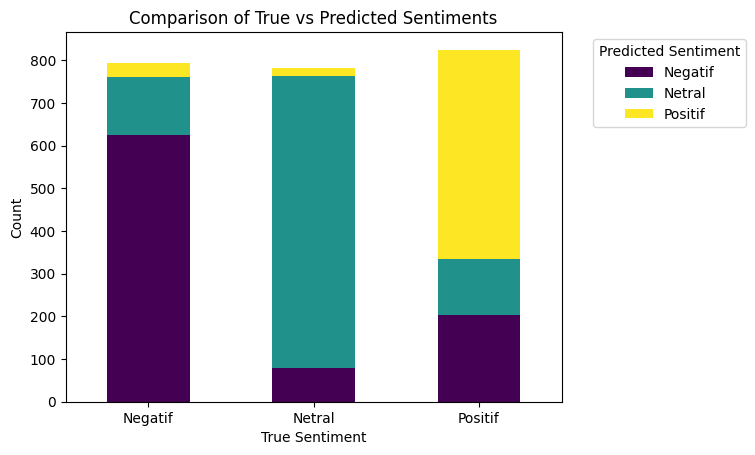

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (20:80)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.80,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 10:90**

Random Forest Accuracy: 0.7044444444444444
Random Forest Precision: 0.7431026080760623
Random Forest Recall: 0.7044444444444444
Random Forest F1 Score: 0.6966230963364536
Confusion Matrix for Random Forest:
[[659 199  32]
 [ 85 789  16]
 [241 225 454]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.67      0.74      0.70       890
      Netral       0.65      0.89      0.75       890
     Positif       0.90      0.49      0.64       920

    accuracy                           0.70      2700
   macro avg       0.74      0.71      0.70      2700
weighted avg       0.74      0.70      0.70      2700



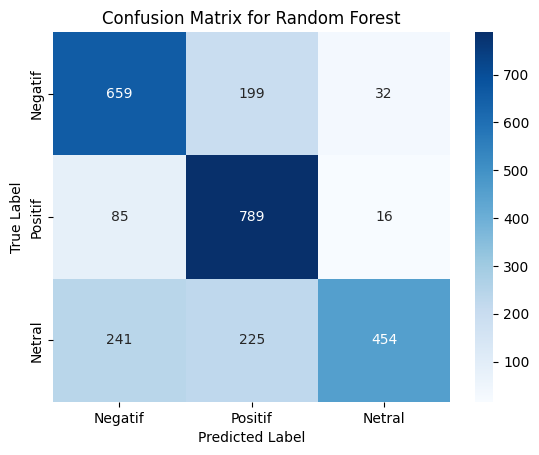

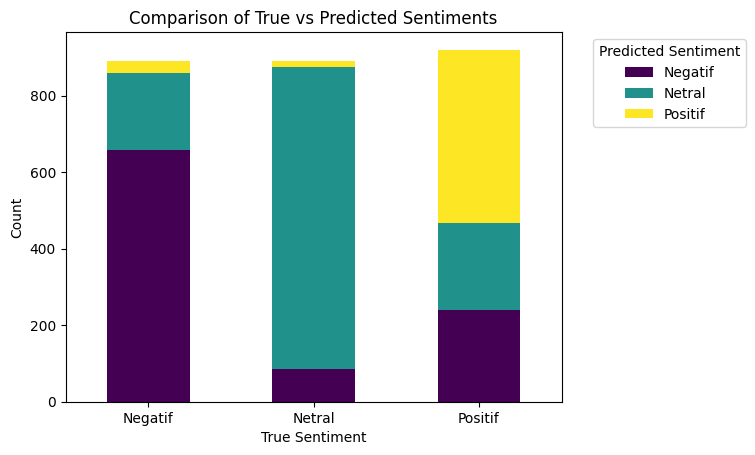

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (10:90)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.90,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**MENAMPILKAN JUMLAH SENTIMEN**

In [ ]:
# Menampilkan jumlah sentimen positif dan negatif
jumlah_sentimen = df['Sentiments'].value_counts()
print("Jumlah Sentimen Positif, Negatif dan Netral:")
print(jumlah_sentimen)

Jumlah Sentimen Positif, Negatif dan Netral:
Sentiments
Negatif    1000
Positif    1000
Netral     1000
Name: count, dtype: int64


**WORDCLOUD**

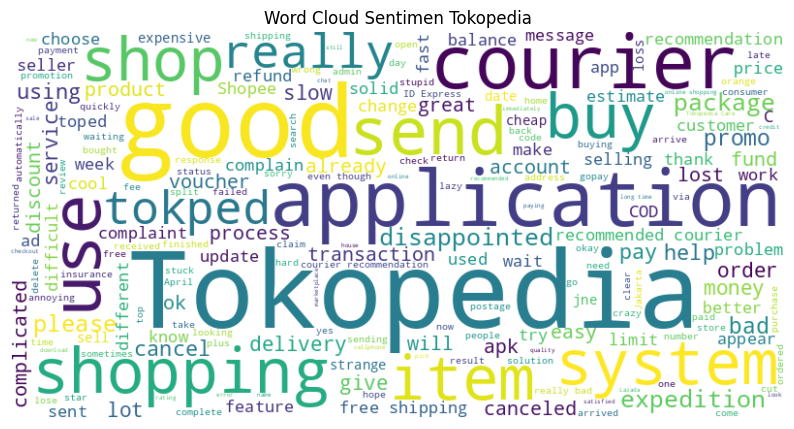

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Contoh data untuk visualisasi word cloud
all_comments = ' '.join(df['Ulasan'])

# Visualisasi word cloud untuk komentar
plot_word_cloud(all_comments, 'Word Cloud Sentimen Tokopedia')

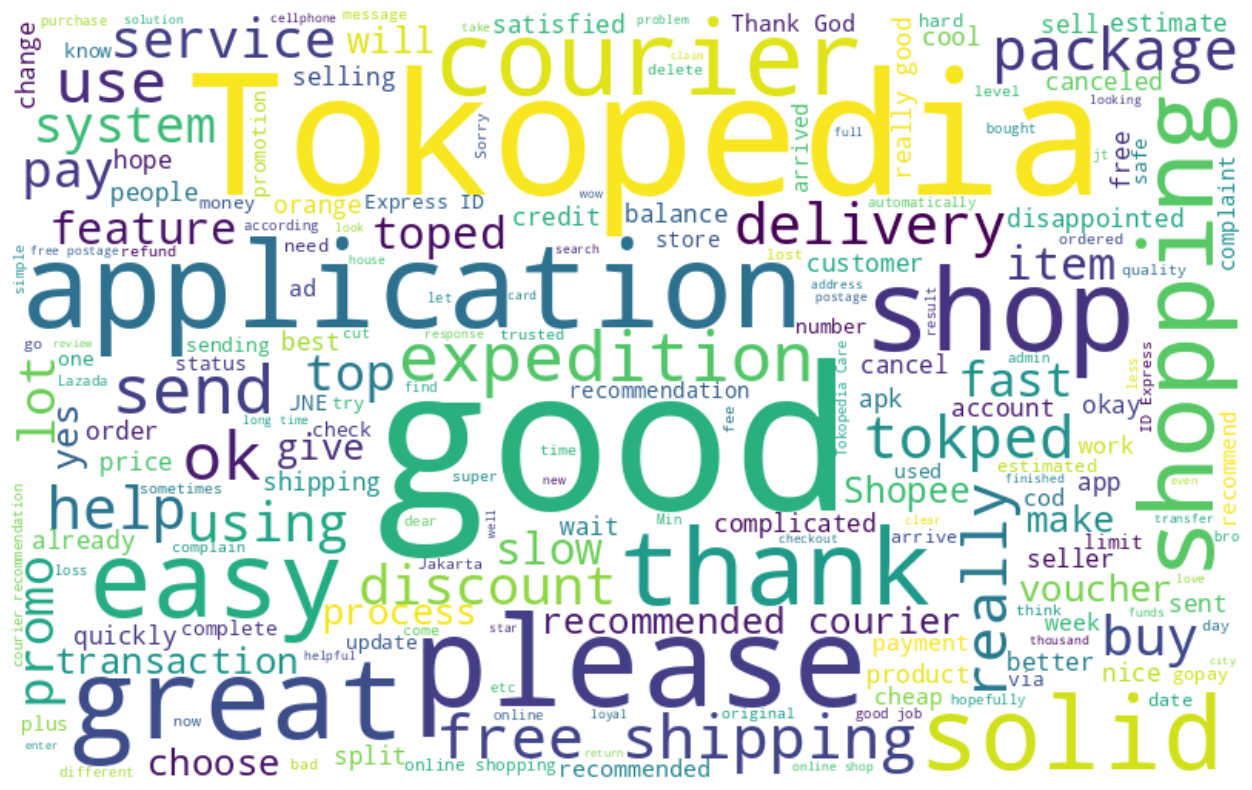

In [ ]:
df_p=df[df['Sentiments']== "Positif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

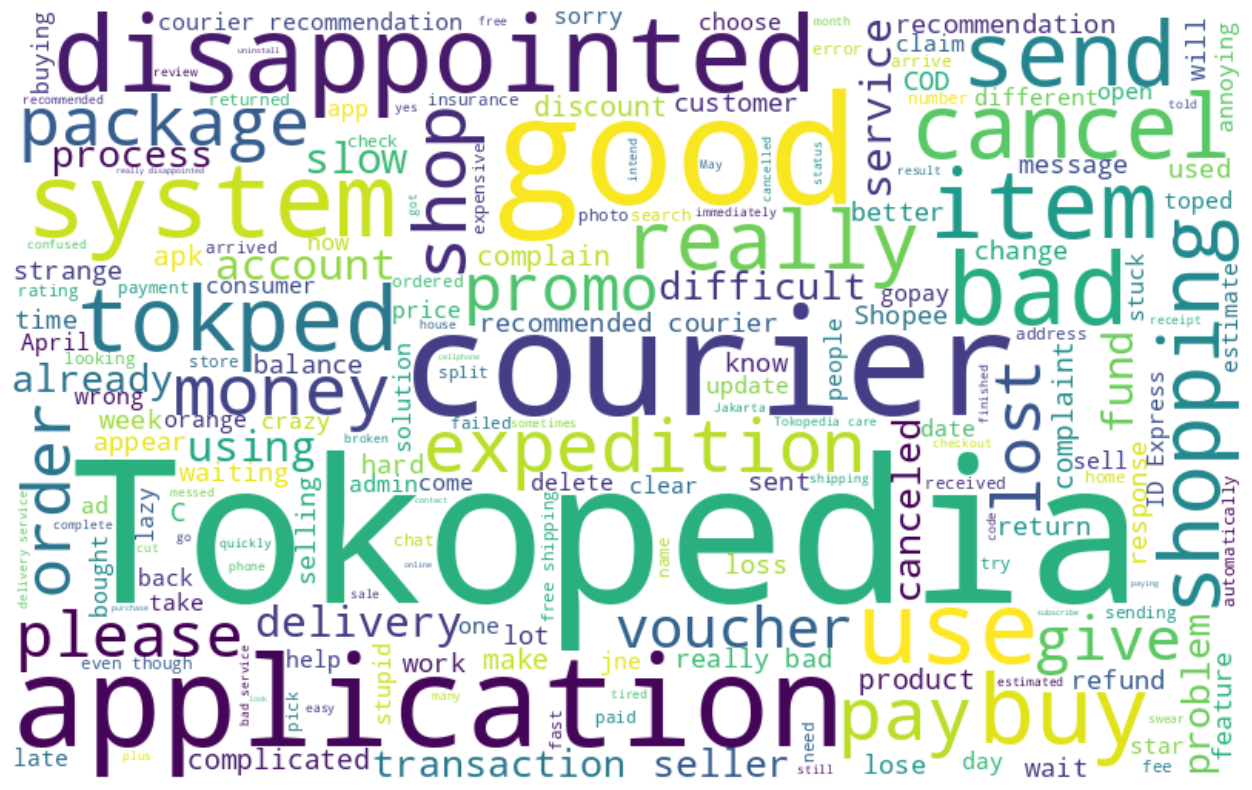

In [ ]:
df_p=df[df['Sentiments']== "Negatif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

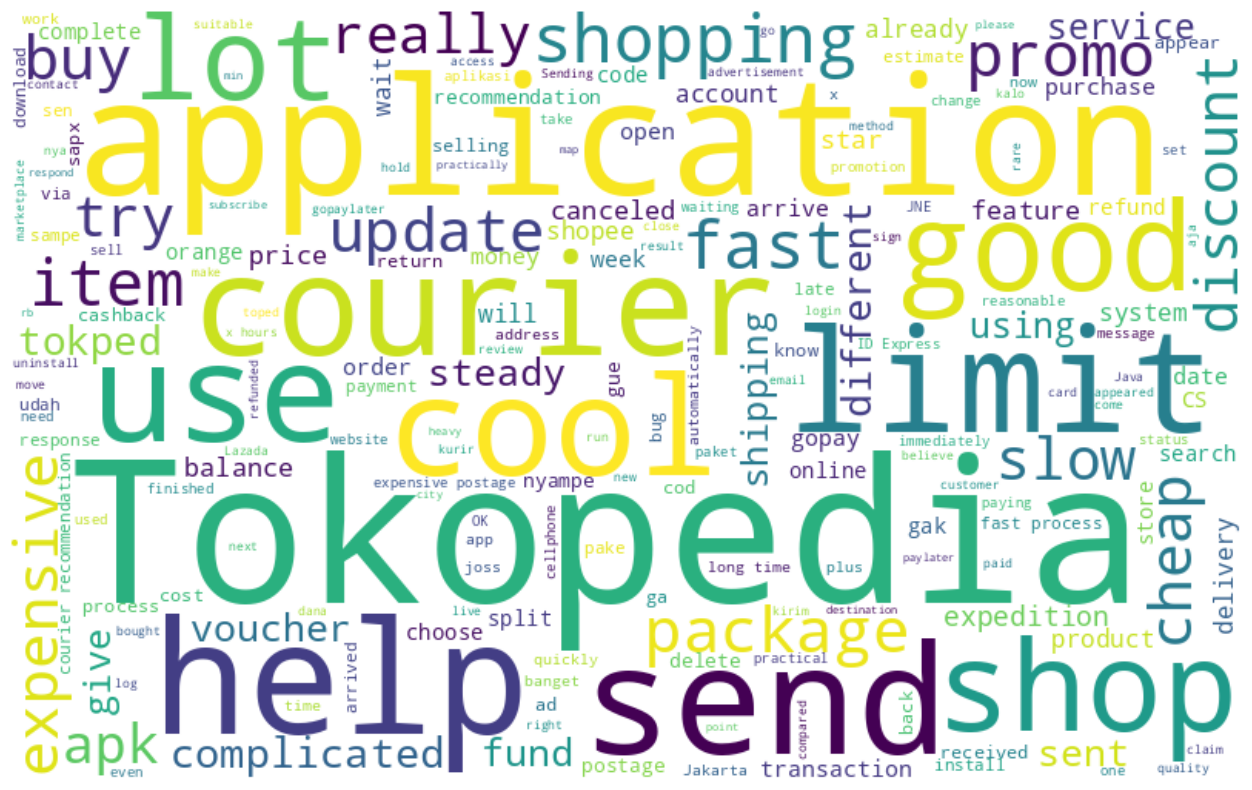

In [ ]:
df_p=df[df['Sentiments']== "Netral"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');